### 야금학적 특징 추출 방법 
![image-2.png](../img/feature_extracting.png)

In [18]:
import os
import argparse
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from math import pi
import glob
import pandas as pd

parser = argparse.ArgumentParser(description='prediction features extraction')

parser.add_argument('--pred_path', type=str, default='../segmentation/data/IN792sx/gamma/seg_result/')
parser.add_argument('--save_path', type=str, default='../segmentation/data/IN792sx/gamma/property/')

args = parser.parse_args(list())



In [14]:
img_list = glob.glob(args.pred_path+'*.*')

name_list = []
aspect_list = []
avg_width_list = []
avg_cir_list = []
area_list = []
gamma_phase_list = []
gammaP_phase_list = []

In [22]:
def cal_rect(contours_xy):
    cnt = contours_xy
    
    rect = cv2.minAreaRect(cnt)
    x,y,w,h = cv2.boundingRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    return box, x,y,w,h


In [75]:
n = img_list[0]
name = n.split('\\')[-1]
name_list.append(name)

name_ = name[:-4]

save_path = os.path.join(args.save_path, name_ + '/')

img = cv2.imread(n)
img_cp = img.copy()
imgray = cv2.cvtColor(img_cp, cv2.COLOR_BGR2GRAY)
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)
contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


In [67]:
img_h, img_w, _  = img.shape
img_flatten = imgray.flatten()
gamma = len(np.where(img_flatten==255)[0])
gamma_prime = len(np.where(img_flatten==0)[0])
print('감마상분율 : ', (gamma/len(img_flatten))*100)
print('감마프라임상분율 : ',(gamma_prime/len(img_flatten))*100)

감마상분율 :  60.746895926339285
감마프라임상분율 :  39.253104073660715


In [76]:
for i in range(len(contour)):
    contours_xy = np.array(contour[i])
    box, x, y, w, h = cal_rect(contours_xy)
    img_rect = cv2.drawContours(img_cp,[box],0,(0,0,255),2)

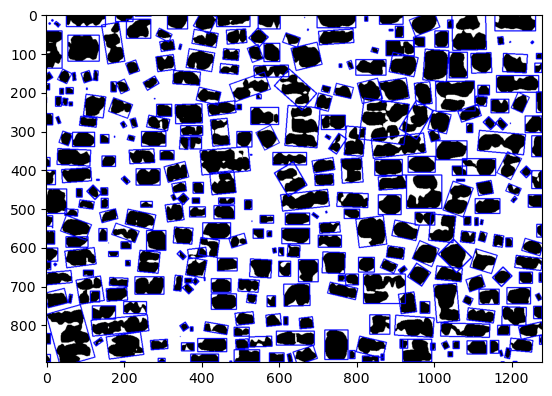

In [29]:
plt.imshow(img_rect)
plt.show()

In [34]:
img_tmp = np.ones((img_h, img_w, 3), dtype=np.uint8)*255

trim_fill_img = cv2.fillPoly(img_tmp,[contours_xy], color = (0,0,0))
img_trim = trim_fill_img[y:y+h, x:x+w]

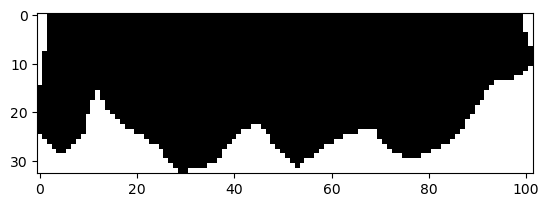

In [35]:
plt.imshow(img_trim)
plt.show()

In [56]:
trim_gray = cv2.cvtColor(img_trim, cv2.COLOR_BGR2GRAY)
trim_flatten = trim_gray.flatten()
trim_gamma_prime = len(np.where(trim_flatten==0)[0])
print('gamma prime 면적 : ', trim_gamma_prime)

def cal_distrib(gamma_prime):
    distrib = None

    if gamma_prime <= 2538:
        distrib = 0
    elif 2538 < gamma_prime and gamma_prime <=7614:
        distrib = 1
    elif 7614 < gamma_prime and gamma_prime <=25380:
        distrib = 2
    elif 25380 < gamma_prime and gamma_prime <=76142:
        distrib = 3
    elif 76142 < gamma_prime:
        distrib = 4            
    return distrib

distrib = cal_distrib(trim_gamma_prime)
print('gamma prime 면적 분포 : group', distrib)


gamma prime 면적 :  2302
gamma prime 면적 분포 : group 1


In [69]:
for i in range(len(contour)):

    contours_xy = np.array(contour[i])
    box, x, y, w, h = cal_rect(contours_xy)

    img_rect = cv2.drawContours(img_cp,[box],0,(0,0,255),2)
    img_tmp = np.ones((img_h, img_w, 3), dtype=np.uint8)*255

    trim_fill_img = cv2.fillPoly(img_tmp,[contours_xy], color = (0,0,0))
    img_trim = trim_fill_img[y:y+h, x:x+w]

    trim_gray = cv2.cvtColor(img_trim, cv2.COLOR_BGR2GRAY)
    trim_flatten = trim_gray.flatten()
    trim_gamma_prime = len(np.where(trim_flatten==0)[0])
    gamma_size.append(trim_gamma_prime)


    distrib = cal_distrib(trim_gamma_prime)
    gamma_size_distrib.append(distrib)

area_0, area_1, area_2, area_3, area_4 = 0, 0, 0, 0, 0
for k in range(len(gamma_size_distrib)):
    if gamma_size_distrib[k] == 0:
        area_0 += 1
    elif gamma_size_distrib[k] == 1:
        area_1 += 1
    elif gamma_size_distrib[k] == 2:
        area_2 += 1
    elif gamma_size_distrib[k] == 3:
        area_3 += 1
    else: area_4+= 1

if len(gamma_size_distrib) == 0:
    area_0 = None
    area_1 = None
    area_2 = None
    area_3 = None
    area_4 = None
else:
    area_0 = round(area_0/len(gamma_size_distrib)*100,3)
    area_1 = round(area_1/len(gamma_size_distrib)*100,3)
    area_2 = round(area_2/len(gamma_size_distrib)*100,3)
    area_3 = round(area_3/len(gamma_size_distrib)*100,3)
    area_4 = round(area_4/len(gamma_size_distrib)*100,3)

print(' area_0 분포 : ', area_0)
print(' area_1 분포 : ', area_1)
print(' area_2 분포 : ', area_2)
print(' area_3 분포 : ', area_3)
print(' area_4 분포 : ', area_4)


 area_0 분포 :  85.596
 area_1 분포 :  14.127
 area_2 분포 :  0.277
 area_3 분포 :  0.0
 area_4 분포 :  0.0


In [47]:
trim_h, trim_w, _ = img_trim.shape
if trim_h > trim_w:
    a = trim_h
    b = trim_w
else:
    a = trim_w
    b = trim_h

trim_ratio = a/b

print('gamma prime aspect ratio : ', (trim_ratio*trim_gamma_prime))

gamma prime aspect ratio :  7878.727272727273


In [70]:
for i in range(len(contour)):

    contours_xy = np.array(contour[i])
    box, x, y, w, h = cal_rect(contours_xy)

    img_rect = cv2.drawContours(img_cp,[box],0,(0,0,255),2)
    img_tmp = np.ones((img_h, img_w, 3), dtype=np.uint8)*255

    trim_fill_img = cv2.fillPoly(img_tmp,[contours_xy], color = (0,0,0))
    img_trim = trim_fill_img[y:y+h, x:x+w]

    trim_gray = cv2.cvtColor(img_trim, cv2.COLOR_BGR2GRAY)
    trim_flatten = trim_gray.flatten()
    trim_gamma_prime = len(np.where(trim_flatten==0)[0])
    gamma_size.append(trim_gamma_prime)

    trim_h, trim_w, _ = img_trim.shape
    if trim_h > trim_w:
        a = trim_h
        b = trim_w
    else:
        a = trim_w
        b = trim_h

    trim_ratio = a/b

    gamma_ratios.append(trim_ratio*trim_gamma_prime)

Aspect_ratio = 0
for k in range(len(gamma_ratios)):
    Aspect_ratio += gamma_ratios[k]
print(' total gamma prime aspect ratio : ', Aspect_ratio/gamma_prime)

 total gamma prime aspect ratio :  1.5662583601441904


In [71]:
def cal_width(img, gamma_prime, b):
    h, w, _ = img.shape
    return b*gamma_prime/(h*w)

trimW = cal_width(img_trim, trim_gamma_prime, b)     
print('gamma prime 폭 : ', trimW)


gamma prime 폭 :  24.99019607843137


In [77]:
for i in range(len(contour)):

    contours_xy = np.array(contour[i])
    box, x, y, w, h = cal_rect(contours_xy)

    img_rect = cv2.drawContours(img_cp,[box],0,(0,0,255),2)
    img_tmp = np.ones((img_h, img_w, 3), dtype=np.uint8)*255

    trim_fill_img = cv2.fillPoly(img_tmp,[contours_xy], color = (0,0,0))
    img_trim = trim_fill_img[y:y+h, x:x+w]

    trim_gray = cv2.cvtColor(img_trim, cv2.COLOR_BGR2GRAY)
    trim_flatten = trim_gray.flatten()
    trim_gamma_prime = len(np.where(trim_flatten==0)[0])
    gamma_size.append(trim_gamma_prime)


    distrib = cal_distrib(trim_gamma_prime)
    gamma_size_distrib.append(distrib)


    trim_h, trim_w, _ = img_trim.shape
    if trim_h > trim_w:
        a = trim_h
        b = trim_w
    else:
        a = trim_w
        b = trim_h

    trim_ratio = a/b

    trimW = cal_width(img_trim, trim_gamma_prime, b)     
    gamma_W.append(trimW*trim_gamma_prime)

avg_width = 0
for k in range(len(gamma_bboxes)):
    avg_width += gamma_W[k]
print('total gamma prime 평균 폭 : ', avg_width/gamma_prime)


total gamma prime 평균 폭 :  65.80506114756315


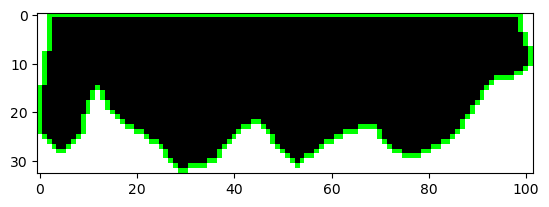

In [54]:

imgray = cv2.cvtColor(img_trim, cv2.COLOR_BGR2GRAY)

ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)
contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
perimeter = len(contour[0])
cnt = contour[0]
circle_img = cv2.drawContours(img_trim, [cnt], 0, (0,255,0), 1)    
    
plt.imshow(circle_img)
plt.show()

In [55]:

def cal_circle(img, gamma_prime):
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)
    contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    perimeter = len(contour[0])
   
    
    return (4*pi*gamma_prime)/(perimeter*perimeter)

trimC = cal_circle(img_trim, trim_gamma_prime)
print('gamma prime circularity : ', trimC)

gamma prime circularity :  0.5515001238959648


In [81]:
gamma_circle = []
for i in range(len(contour)):

    contours_xy = np.array(contour[i])
    box, x, y, w, h = cal_rect(contours_xy)

    img_rect = cv2.drawContours(img_cp,[box],0,(0,0,255),2)
    img_tmp = np.ones((img_h, img_w, 3), dtype=np.uint8)*255

    trim_fill_img = cv2.fillPoly(img_tmp,[contours_xy], color = (0,0,0))
    img_trim = trim_fill_img[y:y+h, x:x+w]

    trim_gray = cv2.cvtColor(img_trim, cv2.COLOR_BGR2GRAY)
    trim_flatten = trim_gray.flatten()
    trim_gamma_prime = len(np.where(trim_flatten==0)[0])
    trimC = cal_circle(img_trim, trim_gamma_prime)
    gamma_circle.append(trimC*trim_gamma_prime)

avg_cir = 0
for k in range(len(gamma_circle)):
    avg_cir += gamma_circle[k]
print('total gamma prime 평균 circularity : ', avg_cir/gamma_prime)


total gamma prime 평균 circularity :  0.7947801074172299
